**1. Import Packages**

In [1]:
#'Pandas' is used for data manipulation and analysis
import pandas as pd

#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

#'Matplotlib' is a data visualization library for 2D & 3D plots, built on numpy
import matplotlib.pyplot as plt

#'datetime' is used to perform date & time operations
import datetime as dt

#'StandardScaler' is from sklearn.preprocessing module is used to scale the data
from sklearn.preprocessing import StandardScaler

#'eig' from numpy.linalg to calculate eigen values & eigen vectors
from numpy.linalg import eig

#'PCA' function to perform Pricipal Component Analysis using sklearn library
from sklearn.decomposition import PCA

**2. Read the Data**

In [2]:
#read the data
raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\PCA\Principal Component Analysis (PCA)\Dataset\houseprice.csv")

#print first 5 rows
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**3. Understand and Prepare the Data**

In [3]:
#the parameter 'index_col' will change the index to the specified column
raw_data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\PCA\Principal Component Analysis (PCA)\Dataset\houseprice.csv", index_col=0)

#print first 5 rows
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**3.1 Data Types and Dimensions**

In [4]:
#chect the data types for variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
#get the shape
print(raw_data.shape)

(1460, 80)


In [6]:
#Use .astype() to change the data type
#Use ' for loop' to change the data type of a large number of columns
for feature in ['MSSubClass', 'OverallQual', 'OverallCond']:
    raw_data[feature] = raw_data[feature].astype('object')

In [7]:
#recheck the data types
raw_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

**3.2 Feature Engineering**

In [8]:
#'now().year' gives the current year
#store the year as 'current_year'
current_year = int(dt.datetime.now().year)

In [9]:
#creating 2 new columns as 'Building_age' and 'Remodel_age'
Building_age = current_year - raw_data.YearBuilt
Remodel_age = current_year - raw_data.YearRemodAdd

In [10]:
#add the above columns in our dataframe
raw_data['Building_age'] = Building_age
raw_data['Remodel_age'] = Remodel_age

In [11]:
#print the head of the data to check whether the new columns are added or not
raw_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500,19,19
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500,46,46
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500,21,20
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,107,52
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000,22,22


In [12]:
raw_data.shape

(1460, 82)

**3.3 Missing Data Treatment**

In [13]:
# sorting variables on the basis of null values
# 'ascending = False' sorts values in descending order
Total = raw_data.isnull().sum().sort_values(ascending=False)

# percentage  of missing values
Percent = (raw_data.isnull().sum() * 100 / raw_data.shape[0]).sort_values(ascending=False)

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
HalfBath,0,0.000000
BedroomAbvGr,0,0.000000
KitchenAbvGr,0,0.000000
KitchenQual,0,0.000000


Replace the 'NA' values with their actual meaning as per the data definition

In [14]:
# replcae the NA values in 'Alley' with a valid value, 'No alley access'
raw_data['Alley'].fillna('No alley access', inplace=True)

In [15]:
# replcae the NA values in 'MasVnrType' with a valid value, 'None'
raw_data['MasVnrType'].fillna('None', inplace=True)

In [16]:
# use 'for' loop for filling NA with 'No Basement' in the following 5 columns
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    raw_data[col].fillna('No Basement', inplace=True)

In [17]:
# replace NA values in 'Electrical' with mode 'SBrkr'
raw_data['Electrical'].fillna('SBrkr', inplace=True)

In [18]:
# replace NA values in 'FireplaceQu' with valid value 'No Fireplace'
raw_data['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [19]:
# use 'for' loop for filling NA with 'No Garage' in the following columns
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    raw_data[col].fillna('No Garage', inplace=True)

In [20]:
# replace NA values in 'PoolQC' with valid value 'No Pool'
raw_data['PoolQC'].fillna('No Pool', inplace=True)

In [21]:
# replace NA values in 'Fence' with valid value 'No Fence'
raw_data['Fence'].fillna('No Fence', inplace=True)

In [22]:
# replace NA values in 'MiscFeature' with valid value 'None'
raw_data['MiscFeature'].fillna('None', inplace=True)

In [23]:
# Replace 'LotFrontage' 17.74% of missing values with its median value
raw_data['LotFrontage'].fillna(raw_data['LotFrontage'].median(), inplace=True)

In [24]:
# Replace 'MasVnrArea' 0.55% of missing values with 0 mode
raw_data['MasVnrArea'].fillna(0, inplace=True)

In [25]:
# Replace 'GarageYrBlt' missing values with 0 mode
raw_data['GarageYrBlt'].fillna(0, inplace=True)

In [26]:
raw_data.isnull().any().sum()

0

**4. Compute Principal Components (from  scratch)**

**4.1 Prepare the Data**

In [27]:
# Select the numerical variables and store it as 'df_numerical_features'
df_numerical_features = raw_data.select_dtypes(include=[np.number])

# to select all the 'numerical' features(independent variables), drop the target variable from 'df_numerical_features'
# use 'drop' function to drop entire column
df_num = df_numerical_features.drop(['SalePrice'], axis=1)

# head() to display top 5 rows
df_num.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Building_age,Remodel_age
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,61,0,0,0,0,0,2,2008,19,19
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,0,5,2007,46,46
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,42,0,0,0,0,0,9,2008,21,20
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,35,272,0,0,0,0,2,2006,107,52
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,84,0,0,0,0,0,12,2008,22,22


**4.2 Scale the Data**

In [28]:
#fit_transform() transforms the data by first computing the mean and sd & later scaling the data
df_num_std = StandardScaler().fit_transform(df_num)

print(df_num_std)

[[-0.22087509 -0.20714171  1.05099379 ...  0.13877749 -1.05099379
  -0.87866809]
 [ 0.46031974 -0.09188637  0.15673371 ... -0.61443862 -0.15673371
   0.42957697]
 [-0.08463612  0.07347998  0.9847523  ...  0.13877749 -0.9847523
  -0.83021457]
 ...
 [-0.1754621  -0.14781027 -1.00249232 ...  1.64520971  1.00249232
  -1.02402865]
 [-0.08463612 -0.08016039 -0.70440562 ...  1.64520971  0.70440562
  -0.53949344]
 [ 0.23325479 -0.05811155 -0.20759447 ...  0.13877749  0.20759447
   0.96256569]]


In [29]:
# 'shape' function gives the total number of rows and columns in the scaled data
df_num_std.shape

(1460, 35)

**4.3 Covariance Matrix**

In [30]:
# generate the covariance matric using 'cov' function
cov_mat = np.cov(df_num_std.T)

# as 'cov_mat' is a numpy array, select first 5 observations with [0:5]
print(cov_mat[0:5])

[[ 1.00068540e+00  3.04730891e-01  1.16765369e-01  8.34052140e-02
   1.78590896e-01  2.14513541e-01  4.24923323e-02  1.24183267e-01
   3.63721436e-01  4.14056133e-01  7.24376356e-02  3.74949923e-02
   3.68259672e-01  9.04047865e-02 -6.98377770e-03  1.80657531e-01
   4.72540062e-02  2.37002365e-01 -4.90803219e-03  3.20737339e-01
   2.33380490e-01  9.92638352e-02  2.69723997e-01  3.23732664e-01
   7.55938857e-02  1.37107470e-01  1.02942634e-02  6.19876851e-02
   3.76808863e-02  1.80942511e-01 -2.55539426e-04  1.04578463e-02
   6.38480650e-03 -1.16765369e-01 -8.34052140e-02]
 [ 3.04730891e-01  1.00068540e+00  1.42374034e-02  1.37978777e-02
   1.03391322e-01  2.14249877e-01  1.11245941e-01 -2.62015458e-03
   2.61011910e-01  2.99679839e-01  5.10208941e-02  4.78224538e-03
   2.63296507e-01  1.58262930e-01  4.80785014e-02  1.26117008e-01
   1.42692420e-02  1.19771944e-01 -1.77960596e-02  1.90145014e-01
   2.71550003e-01  7.26485272e-02  1.54976888e-01  1.80526403e-01
   1.71815369e-01  8.4831

**4.4 Compute Eigenvalues and Eigenvectors**

In [31]:
# use 'eig' function to compute Eigenvalues and Eigenvectors of the covariance vectors
eig_val, eig_vec = eig(cov_mat)

print('Eigenvalues: ', '\n', '\n', eig_val, '\n')
print('Eigenvectors: ', '\n', '\n', eig_vec, '\n')

Eigenvalues:  
 
 [ 7.02177050e+00+0.00000000e+00j  3.31255010e+00+0.00000000e+00j
  2.62014342e+00+0.00000000e+00j  1.89709198e+00+0.00000000e+00j
  1.49734667e+00+0.00000000e+00j  9.99263899e-02+0.00000000e+00j
  1.36214989e-01+0.00000000e+00j  1.95108720e-01+0.00000000e+00j
  2.13950778e-01+0.00000000e+00j  3.01103966e-01+0.00000000e+00j
  3.54408421e-01+0.00000000e+00j  4.01613912e-01+0.00000000e+00j
  1.27323863e+00+0.00000000e+00j  5.45571325e-01+0.00000000e+00j
  5.57495391e-01+0.00000000e+00j  6.14455332e-01+0.00000000e+00j
  6.53106933e-01+0.00000000e+00j  6.65210391e-01+0.00000000e+00j
  1.17628474e+00+0.00000000e+00j  7.70438353e-01+0.00000000e+00j
  7.98982584e-01+0.00000000e+00j  8.42159693e-01+0.00000000e+00j
  8.54295919e-01+0.00000000e+00j  1.12605403e+00+0.00000000e+00j
  1.11386919e+00+0.00000000e+00j  9.17108768e-01+0.00000000e+00j
  1.06812304e+00+0.00000000e+00j  1.04387620e+00+0.00000000e+00j
  9.58644771e-01+0.00000000e+00j  1.01349985e+00+0.00000000e+00j
  9.803

**4.5 Decide the Number of Principal Components**

In [32]:
# Eigenvalues greater than 1
# create the list of eigenvalues
eig_val = list(eig_val)
print(eig_val)
print()

cols = pd.Series(df_num.columns.values)
eig_val_df = pd.DataFrame(columns=["Features", "Eigen_Value"])
eig_val_df["Features"] = cols
eig_val_df["Eigen_Value"] = eig_val
eig_val_df = eig_val_df.sort_values(by="Eigen_Value", ascending=False)
print(eig_val_df.head(10))
print()

#'sort(reverse=True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse=True)
print(eig_val)

[(7.021770499413523+0j), (3.3125501041720953+0j), (2.6201434201098333+0j), (1.8970919779158213+0j), (1.4973466747555353+0j), (0.09992638992418357+0j), (0.13621498924662376+0j), (0.19510871979923156+0j), (0.21395077836552578+0j), (0.30110396633614794+0j), (0.3544084205249457+0j), (0.40161391207370467+0j), (1.2732386321496971+0j), (0.5455713249726756+0j), (0.5574953911006542+0j), (0.6144553317267781+0j), (0.6531069328251312+0j), (0.6652103910693319+0j), (1.1762847353254364+0j), (0.770438352533215+0j), (0.7989825842753202+0j), (0.8421596927472558+0j), (0.854295918939347+0j), (1.1260540287787317+0j), (1.1138691902660702+0j), (0.9171087678623909+0j), (1.068123042312322+0j), (1.043876201199528+0j), (0.9586447711070988+0j), (1.0134998547738208+0j), (0.9803440369826906+0j), (-1.230760234311763e-16+7.216071427229691e-17j), (-1.230760234311763e-16-7.216071427229691e-17j), (1.424272579059852e-16+0j), (2.3879633991438446e-16+0j)]

         Features         Eigen_Value
0     LotFrontage  7.021770+0

C:\Users\ashraf\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


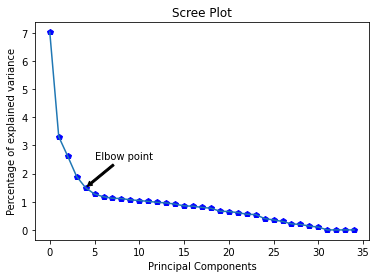

In [33]:
# Scree plot
# 'bp' represents blue color & pentagonal shape of points
plt.plot(eig_val, 'bp')

# plot a line plot
plt.plot(eig_val)

# label the x-axis
plt.xlabel('Principal Components')

# label the y-axis
plt.ylabel('Percentage of explained variance')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text='Elbow point', xy=(4, 1.5), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle='simple'))

# title of the plot
plt.title("Scree Plot")

plt.show()

**4.6 Calculate Principal Components**

In [38]:
eigenvector = eig_vec[:, eig_val_df.index.values[0:5]]

eigenvector

array([[-0.15734148+0.j, -0.0814686 +0.j,  0.22587062+0.j,
         0.10722212+0.j, -0.00752845+0.j],
       [-0.10597576+0.j, -0.04682612+0.j,  0.26517756+0.j,
        -0.01500761+0.j, -0.00786312+0.j],
       [-0.25598505+0.j,  0.25193829+0.j, -0.22644764+0.j,
        -0.03246855+0.j,  0.04820808+0.j],
       [-0.23277906+0.j,  0.15445072+0.j, -0.2753199 +0.j,
        -0.01428159+0.j,  0.26832427+0.j],
       [-0.1912835 +0.j, -0.00691731+0.j,  0.04663417+0.j,
        -0.02642127+0.j, -0.07848375+0.j],
       [-0.14599174+0.j,  0.21408979+0.j,  0.34881371+0.j,
        -0.2640932 +0.j,  0.14572962+0.j],
       [ 0.00973451+0.j,  0.03635902+0.j,  0.17643327+0.j,
        -0.08698812+0.j, -0.03447938+0.j],
       [-0.10716365+0.j, -0.12447427+0.j, -0.17122358+0.j,
         0.56562785+0.j, -0.04965918+0.j],
       [-0.25613609+0.j,  0.11057602+0.j,  0.25506258+0.j,
         0.26315384+0.j,  0.08881146+0.j],
       [-0.25253012+0.j,  0.03831097+0.j,  0.30414927+0.j,
         0.28994057+0.j

In [48]:
# take the dot product of 'df_num_std' with 'eigenvector' to obtain new dataset
# create a dataframe of pricipal components
df_pca = pd.DataFrame(df_num_std.dot(eigenvector), columns=list(eig_val_df["Features"])[0:5])

# head() to display top 5 rows
df_pca.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea
0,-1.571468+0.000000j,0.233699+0.000000j,-1.586585+0.000000j,-2.219473+0.000000j,0.715615+0.000000j
1,-0.199890+0.000000j,0.835867+0.000000j,1.050234+0.000000j,0.097077+0.000000j,-0.627275+0.000000j
2,-1.740971+0.000000j,0.251788+0.000000j,-1.391157+0.000000j,-1.637273+0.000000j,0.046151+0.000000j
3,1.470652+0.000000j,-1.877190+0.000000j,1.515307+0.000000j,-0.180157+0.000000j,-1.837106+0.000000j
4,-4.216754+0.000000j,-1.116376+0.000000j,-0.533713+0.000000j,-1.621483+0.000000j,-0.334647+0.000000j


In [40]:
# checking the shape of new data
df_pca.shape

(1460, 5)

**5. PCA using sklearn**

In [41]:
# specify required no. of components
# take 'n_components=5' based on the analysis of scree plot
pca = PCA(n_components=5, random_state=0)

# fit_transform() computes the principal components
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(df_num_std)

In [43]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(PrincipalComponents, columns=list(eig_val_df["Features"])[0:5])

# head() to display top 5 rows
PCA_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea
0,1.571352,-0.240622,-1.586777,-2.241474,0.753565
1,0.199709,-0.835527,1.042285,0.089567,-0.634687
2,1.741028,-0.250540,-1.389540,-1.627933,0.038217
3,-1.470503,1.871470,1.526313,-0.195221,-1.759654
4,4.216874,1.125024,-0.532845,-1.588267,-0.391245
